<a href="https://colab.research.google.com/github/Yamito548/Trabajos-cursos-IA-y-big-data/blob/main/Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta actividad utiliza el dataset de kaagle sobre [worldnews on Reddit](https://www.kaggle.com/datasets/rootuser/worldnews-on-reddit). Básicamente los datos que vemos fueron sacados del subreedit

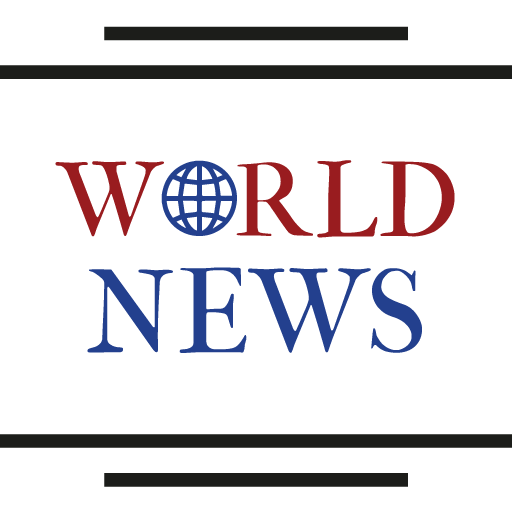

# Librerías

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk

# Cargamos el dataset

In [ ]:
!pip install gdown
import gdown
file_id = '1YYIEzxfWH15CClrzOKoLxPJARrsjFRV3'
output_file_path = '/content/dataset.csv'
# Descargar el archivo
!gdown --id $file_id -O $output_file_path

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YYIEzxfWH15CClrzOKoLxPJARrsjFRV3
To: /content/dataset.csv
100% 82.2M/82.2M [00:00<00:00, 106MB/s]


Tuve que subirlo a mi drive y cargalo desde ahí porque a mi pc le costaba mucho el cargalo y en ocasiones ni llegaba a hacerlo.

In [ ]:
data = pd.read_csv("dataset.csv")
data

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


Vemos los datos del dataset, el cual es bastante grande teniendo 8 columnas y 509236 filas, siendo de los datasets más grandes que he tenido que manipular.

# Manipulación de los datos

Vemos los títulos de las noticias

In [ ]:
newstitle = data["title"].values
newstitle

array(['Scores killed in Pakistan clashes',
       'Japan resumes refuelling mission',
       'US presses Egypt on Gaza border', ...,
       'Professor receives Arab Researchers Award',
       'Nigel Farage attacks response to Trump ambassador tweet',
       'Palestinian wielding knife shot dead in West Bank: Israel police'],
      dtype=object)

In [ ]:
# Instalar nltk si no está instalado
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Dividimos por palabras los títulos.

In [ ]:
newsVec = [nltk.word_tokenize(title) for title in newstitle]

In [ ]:
#Vemos los títulos divididos por palabras.
newsVec

Aquí lo que haremos será dividir los títulos de las noticias en palabras individuales creando así listas en donde cada título tiene sus palabras divididas. Recuerda que son muchas por lo que el resultado de verlas es muy largo, por lo que recomiendo solo ver algunos ejemplos de como ha quedado.

# Creamos el modelo

In [ ]:
model = Word2Vec(newsVec, min_count= 1, vector_size=32)

Aquí me dio un problema de compatibilidad. Estaba siguiendo el video pero cuando fui a ejecutar el modelo, me dio un error en el parámetro **size** pero gracias a mi amigo chatgpt, me dio la solución al problema y era que **size** ya no se usaba o da problemas con la nueva versión de gensim pero se puede usar vector_size en su lugar.

Probamos de que es capaz de búscar similitudes con otras palabras.

In [ ]:
model.wv.most_similar('men')

[('girls', 0.8853245377540588),
 ('boys', 0.8837795257568359),
 ('teenagers', 0.8684070706367493),
 ('foreigners', 0.8496828079223633),
 ('students', 0.8481076955795288),
 ('women', 0.84235018491745),
 ('inmates', 0.8333673477172852),
 ('children', 0.8329078555107117),
 ('males', 0.8269201517105103),
 ('people', 0.8179082274436951)]

En este caso también tuve un problema, otra vez con la versión del gensim que tengo, la cual es la actual frente a la que utilizó en el 2019 el chico del vídeo. Pero este error también tiene solución y es facíl de identificar ya que en el mismo vídeo al chico le sale un mensaje diciendole que sí, funciona pero con la nueva versión esta opción se perderá y le sugiere usar la nueva, que es la que he usado en este proyecto. En este resultado, se pueden ver 10 palabras y su porcentaje de relación según el entrenamiento de nuestro modelo.

In [27]:
vec = model.wv['king'] - model.wv['man'] + model.wv["woman"]
model.wv.most_similar([vec])

[('king', 0.9628679752349854),
 ('prince', 0.7986353039741516),
 ('King', 0.7536882162094116),
 ('monarchy', 0.7425538897514343),
 ('cleric', 0.7374668121337891),
 ('princess', 0.7316463589668274),
 ('politician', 0.7245654463768005),
 ('blogger', 0.7024559378623962),
 ('royal', 0.6953523755073547),
 ('crown', 0.6906578540802002)]

Aquí lo que intentamos hacer es conseguir palabras relacionadas a King pero en el contexto de las palabras man y woman. Dándonos como resultado todas las palabras que ves ahí que tienen que ver con la monarquía como puede ser el propio king, prince, monarchy, princess ect.